#Business Understanding
###Evaluasi kelayakan energi surya

Tujuan dari evaluasi kelayakan energi surya adalah untuk menentukan apakah pemasangan sistem energi surya (seperti panel surya) di suatu lokasi tertentu layak secara teknis, ekonomi, dan lingkungan. Evaluasi ini membantu pengambil keputusan (individu, perusahaan, atau pemerintah) dalam merencanakan investasi energi surya dengan lebih baik. Karena dataset belum mempunyai label maka pemodelan Clustering lebih tepat untuk membuat kategori kelayakan secara otomatis
Hasil cluster berfungsi untuk menginterpretasikan label secara manual, misalnya:

1.   Cluster 1 → Skor viability tinggi → "Sangat Layak"
2.   Cluster 2 → Skor sedang → "Layak"
3. Cluster 3 → Skor rendah → "Kurang Layak"



# Dataset
Dari (https://www.kaggle.com/datasets/shaistashahid/urban-solar-roi-and-sustainability)

# About Dataset.
 Comparative Analysis of Solar Feasibility, Market Economics & Carbon Reduction
Solar Energy Potential & Economics Dataset
This dataset provides key metrics for evaluating solar energy feasibility across different cities worldwide.
It includes geographic information, solar radiation characteristics, installation statistics, cost estimates,
economic returns, and environmental impact to support solar energy planning, policy research, and market analysis.

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy as sp

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for path, dirs, files in os.walk('/kaggle/input/urban-solar-roi-and-sustainability'):
    for file in files:
        print(os.path.join(path, file))

#Kaggle

In [38]:
df = pd.read_csv("solar_energy_worldwide.csv")


# Data Understanding
###Eksploratory data analysis

Jumlah data dan Dimensi Data

In [39]:
df.shape

(48, 17)

In [40]:
df.size

816

In [41]:
df.head()

,City,Country,Latitude,Longitude,Annual_Sunlight_Hours,Daily_Peak_Sun_Hours,GHI_kWh_per_m2,Electricity_Price_USD_per_kWh,Solar_Installations_Count,Avg_System_Cost_USD,Avg_Annual_Production_kWh,Estimated_Annual_Savings_USD,Payback_Period_Years,ROI_Percentage,CO2_Reduction_Tons_per_Year,Solar_Viability_Score,Region
0,New York,United States,40.71,-74.01,2500,6.8,4.5,0.15,142000,15000,11250,1687.5,8.9,11.2,4.50,56,North America
1,Los Angeles,United States,34.05,-118.24,3200,8.8,5.8,0.15,142000,15000,14400,2160.0,6.9,14.5,5.76,67,North America
2,Miami,United States,25.76,-80.19,3000,8.2,5.3,0.15,142000,15000,13500,2025.0,7.4,13.5,5.40,63,North America
3,Phoenix,United States,33.45,-112.07,3800,10.4,6.5,0.15,142000,15000,17100,2565.0,5.8,17.2,6.84,73,North America
4,Chicago,United States,41.88,-87.63,2300,6.3,4.2,0.15,142000,15000,10350,1552.5,9.7,10.3,4.14,53,North America


# Type Variable

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   City                           48 non-null     object 
 1   Country                        48 non-null     object 
 2   Latitude                       48 non-null     float64
 3   Longitude                      48 non-null     float64
 4   Annual_Sunlight_Hours          48 non-null     int64  
 5   Daily_Peak_Sun_Hours           48 non-null     float64
 6   GHI_kWh_per_m2                 48 non-null     float64
 7   Electricity_Price_USD_per_kWh  48 non-null     float64
 8   Solar_Installations_Count      48 non-null     int64  
 9   Avg_System_Cost_USD            48 non-null     int64  
 10  Avg_Annual_Production_kWh      48 non-null     int64  
 11  Estimated_Annual_Savings_USD   48 non-null     float64
 12  Payback_Period_Years           48 non-null     float

In [43]:
df.sum()

City                             New YorkLos AngelesMiamiPhoenixChicagoBerlinMu...
Country                          United StatesUnited StatesUnited StatesUnited ...
Latitude                                                                   1133.25
Longitude                                                                   845.34
Annual_Sunlight_Hours                                                       115750
Daily_Peak_Sun_Hours                                                         316.9
GHI_kWh_per_m2                                                               217.5
Electricity_Price_USD_per_kWh                                                  7.2
Solar_Installations_Count                                                  2328540
Avg_System_Cost_USD                                                         720000
Avg_Annual_Production_kWh                                                   520875
Estimated_Annual_Savings_USD                                              78131.25
Payb

In [44]:
df.isnull().sum()

City                             0
Country                          0
Latitude                         0
Longitude                        0
Annual_Sunlight_Hours            0
Daily_Peak_Sun_Hours             0
GHI_kWh_per_m2                   0
Electricity_Price_USD_per_kWh    0
Solar_Installations_Count        0
Avg_System_Cost_USD              0
Avg_Annual_Production_kWh        0
Estimated_Annual_Savings_USD     0
Payback_Period_Years             0
ROI_Percentage                   0
CO2_Reduction_Tons_per_Year      0
Solar_Viability_Score            0
Region                           0
dtype: int64

#Informasi statistika data

In [45]:
df.describe()

,Latitude,Longitude,Annual_Sunlight_Hours,Daily_Peak_Sun_Hours,GHI_kWh_per_m2,Electricity_Price_USD_per_kWh,Solar_Installations_Count,Avg_System_Cost_USD,Avg_Annual_Production_kWh,Estimated_Annual_Savings_USD,Payback_Period_Years,ROI_Percentage,CO2_Reduction_Tons_per_Year,Solar_Viability_Score
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.00,48.000000,48.0,48.00000,48.000000,48.000000,48.000000,48.000000,48.00000
mean,23.609375,17.611250,2411.458333,6.602083,4.531250,0.15,48511.250000,15000.0,10851.56250,1627.734375,9.781250,10.862500,4.340625,54.50000
std,30.181205,78.169395,582.752053,1.594470,1.000459,0.00,126091.425183,0.0,2622.38424,393.357636,2.488412,2.647731,1.048954,9.81965
min,-37.810000,-123.120000,1450.000000,4.000000,2.800000,0.15,150.000000,15000.0,6525.00000,978.750000,5.800000,6.500000,2.610000,36.00000
25%,10.512500,-44.035000,1887.500000,5.175000,3.800000,0.15,1750.000000,15000.0,8493.75000,1274.062500,7.850000,8.450000,3.397500,47.75000
50%,34.370000,12.040000,2450.000000,6.700000,4.650000,0.15,4800.000000,15000.0,11025.00000,1653.750000,9.100000,11.000000,4.410000,56.50000
75%,45.535000,77.305000,2825.000000,7.750000,5.300000,0.15,13625.000000,15000.0,12712.50000,1906.875000,11.775000,12.775000,5.085000,62.25000
max,59.910000,153.030000,3800.000000,10.400000,6.500000,0.15,609000.000000,15000.0,17100.00000,2565.000000,15.300000,17.200000,6.840000,73.00000


In [46]:
df.duplicated().sum()

np.int64(0)

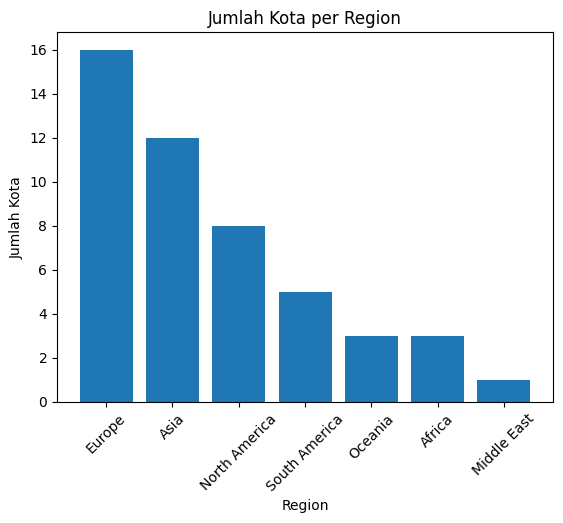

In [47]:
# Bar Chart: Jumlah Kota per Region
region_counts = df['Region'].value_counts()
plt.bar(region_counts.index, region_counts.values)
plt.title('Jumlah Kota per Region')
plt.xlabel('Region')
plt.ylabel('Jumlah Kota')
plt.xticks(rotation=45)
plt.show()

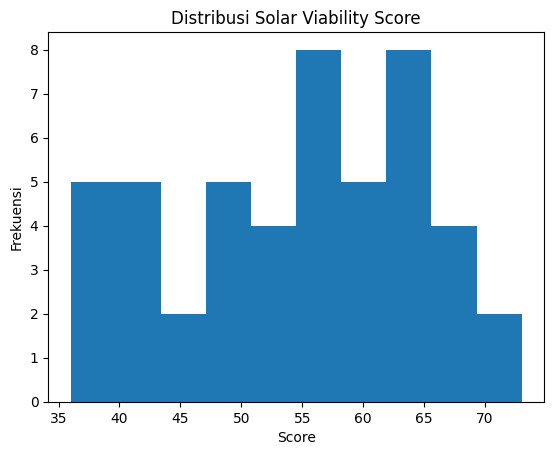

In [48]:
# Histogram: Solar Viability Score
plt.hist(df['Solar_Viability_Score'])
plt.title('Distribusi Solar Viability Score')
plt.xlabel('Score')
plt.ylabel('Frekuensi')
plt.show()

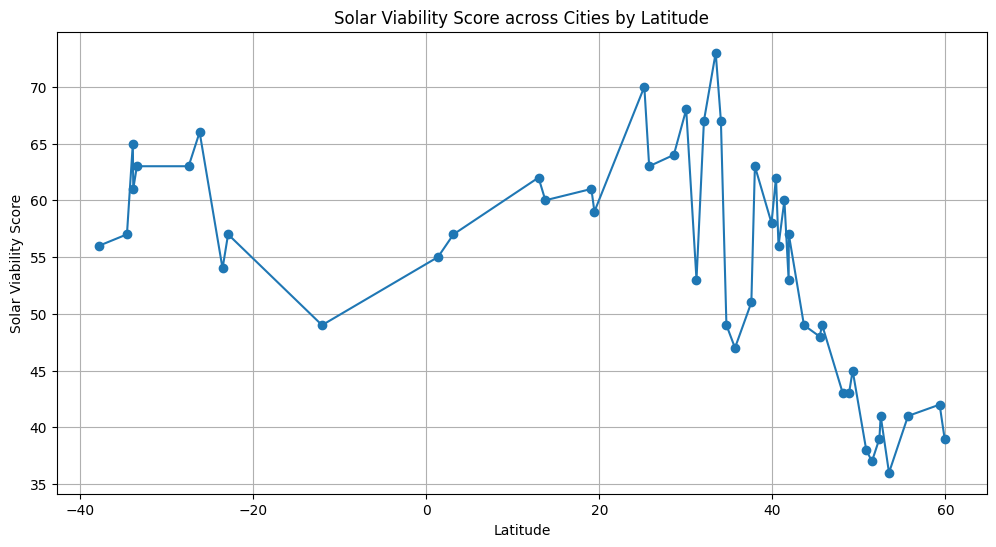

In [49]:
# Sort DataFrame by Latitude for a clearer trend visualization
df_sorted_by_latitude = df.sort_values(by='Latitude').reset_index(drop=True)

# Line Chart: Latitude vs Solar Viability Score
plt.figure(figsize=(12, 6))
plt.plot(df_sorted_by_latitude['Latitude'], df_sorted_by_latitude['Solar_Viability_Score'], marker='o', linestyle='-')
plt.title('Solar Viability Score across Cities by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Solar Viability Score')
plt.grid(True)
plt.show()

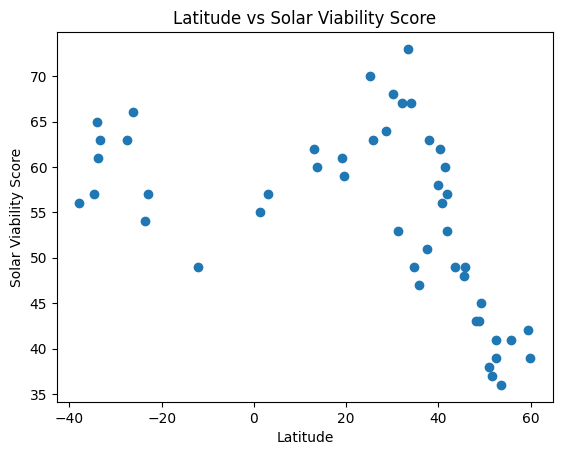

In [50]:
# Scatter Plot: Latitude vs Solar Viability Score
plt.scatter(df['Latitude'], df['Solar_Viability_Score'])
plt.title('Latitude vs Solar Viability Score')
plt.xlabel('Latitude')
plt.ylabel('Solar Viability Score')
plt.show()

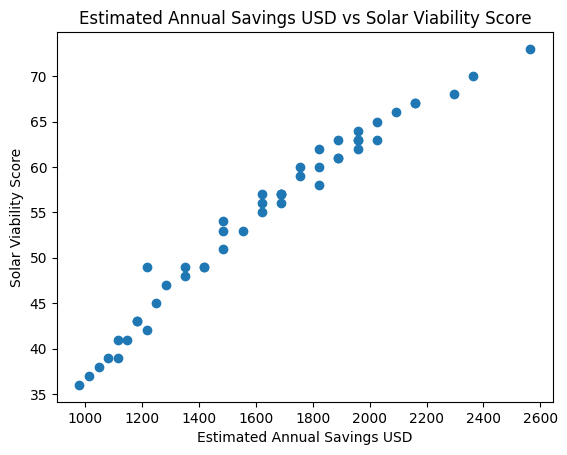

In [51]:
# Scatter Plot: Latitude vs Solar Viability Score
plt.scatter(df['Estimated_Annual_Savings_USD'], df['Solar_Viability_Score'])
plt.title('Estimated Annual Savings USD vs Solar Viability Score')
plt.xlabel('Estimated Annual Savings USD')
plt.ylabel('Solar Viability Score')
plt.show()

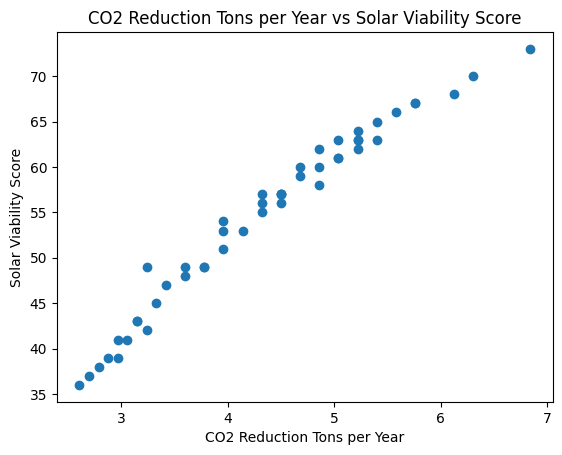

In [52]:
# Scatter Plot: Latitude vs Solar Viability Score
plt.scatter(df['CO2_Reduction_Tons_per_Year'], df['Solar_Viability_Score'])
plt.title('CO2 Reduction Tons per Year vs Solar Viability Score')
plt.xlabel('CO2 Reduction Tons per Year')
plt.ylabel('Solar Viability Score')
plt.show()

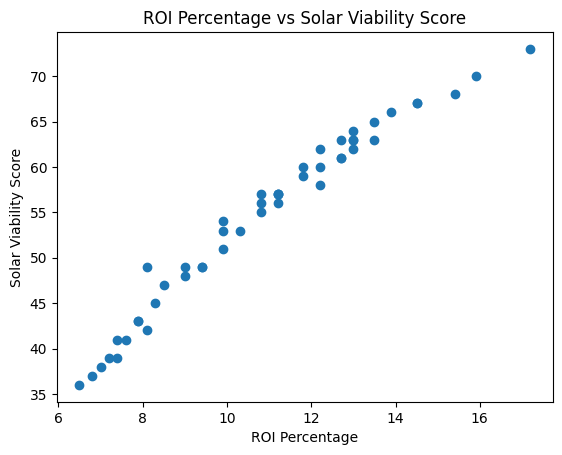

In [53]:
# Scatter Plot: Latitude vs Solar Viability Score
plt.scatter(df['ROI_Percentage'], df['Solar_Viability_Score'])
plt.title('ROI Percentage vs Solar Viability Score')
plt.xlabel('ROI Percentage')
plt.ylabel('Solar Viability Score')
plt.show()

Berdasarkan visualisasi setiap fitur bahwa tidak semua fitur linier terhadap Viability Score sehingga model Clustering lebih tepat digunakan untuk melihat potensi kelayakan energy surya dari berbagai sisi.

#Preprocessing Data

#Cek Duplicate

In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
df.duplicated(['Solar_Viability_Score', 'Region']).sum()

np.int64(4)

In [56]:
df.duplicated(['Solar_Viability_Score', 'Estimated_Annual_Savings_USD']).sum()

np.int64(7)

Ada beberapa data duplicate antar kolom misal Solar Viability Scor dengan Region atau Estimasi Annual Saving. Tetapi data tersebut tidak akan di drop karena dimensi data yang kecil dan agar clustering senatural mungkin.

#Missing Value

In [57]:
df.isna().sum()

City                             0
Country                          0
Latitude                         0
Longitude                        0
Annual_Sunlight_Hours            0
Daily_Peak_Sun_Hours             0
GHI_kWh_per_m2                   0
Electricity_Price_USD_per_kWh    0
Solar_Installations_Count        0
Avg_System_Cost_USD              0
Avg_Annual_Production_kWh        0
Estimated_Annual_Savings_USD     0
Payback_Period_Years             0
ROI_Percentage                   0
CO2_Reduction_Tons_per_Year      0
Solar_Viability_Score            0
Region                           0
dtype: int64

#Outlier Handling

In [58]:
df.describe()

,Latitude,Longitude,Annual_Sunlight_Hours,Daily_Peak_Sun_Hours,GHI_kWh_per_m2,Electricity_Price_USD_per_kWh,Solar_Installations_Count,Avg_System_Cost_USD,Avg_Annual_Production_kWh,Estimated_Annual_Savings_USD,Payback_Period_Years,ROI_Percentage,CO2_Reduction_Tons_per_Year,Solar_Viability_Score
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.00,48.000000,48.0,48.00000,48.000000,48.000000,48.000000,48.000000,48.00000
mean,23.609375,17.611250,2411.458333,6.602083,4.531250,0.15,48511.250000,15000.0,10851.56250,1627.734375,9.781250,10.862500,4.340625,54.50000
std,30.181205,78.169395,582.752053,1.594470,1.000459,0.00,126091.425183,0.0,2622.38424,393.357636,2.488412,2.647731,1.048954,9.81965
min,-37.810000,-123.120000,1450.000000,4.000000,2.800000,0.15,150.000000,15000.0,6525.00000,978.750000,5.800000,6.500000,2.610000,36.00000
25%,10.512500,-44.035000,1887.500000,5.175000,3.800000,0.15,1750.000000,15000.0,8493.75000,1274.062500,7.850000,8.450000,3.397500,47.75000
50%,34.370000,12.040000,2450.000000,6.700000,4.650000,0.15,4800.000000,15000.0,11025.00000,1653.750000,9.100000,11.000000,4.410000,56.50000
75%,45.535000,77.305000,2825.000000,7.750000,5.300000,0.15,13625.000000,15000.0,12712.50000,1906.875000,11.775000,12.775000,5.085000,62.25000
max,59.910000,153.030000,3800.000000,10.400000,6.500000,0.15,609000.000000,15000.0,17100.00000,2565.000000,15.300000,17.200000,6.840000,73.00000


Solar Instalation Count dan Longitude mempunyai selisih nilai yang jauh antara mean medain dan max yang menyebabkan sebaran data tidak normal atau skewness. Data yang mempunyai selisih rentang yang jauh akan menyebabkan Outlier dan distribusi tidak normal. Langkah selanjutnya adalah visualisasi dan hanling outlier serta log transform

In [59]:
!pip install seaborn



[notice] A new release of pip is available: 24.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: ylabel='Solar_Installations_Count'>

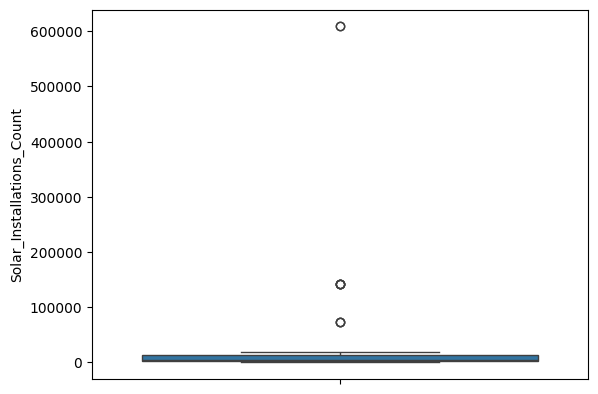

In [60]:
import seaborn as sns 
sns.boxplot(df['Solar_Installations_Count'])

<Axes: ylabel='Longitude'>

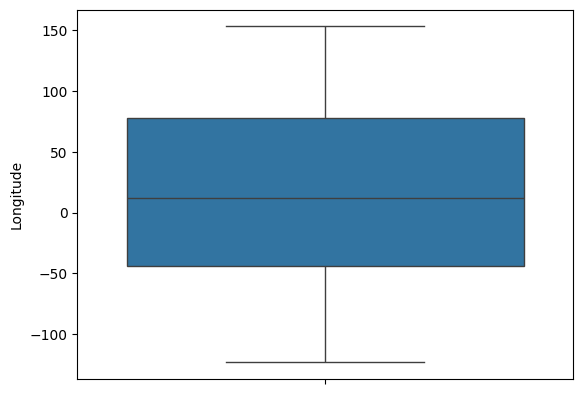

In [61]:
import seaborn as sns

sns.boxplot(df['Longitude'])

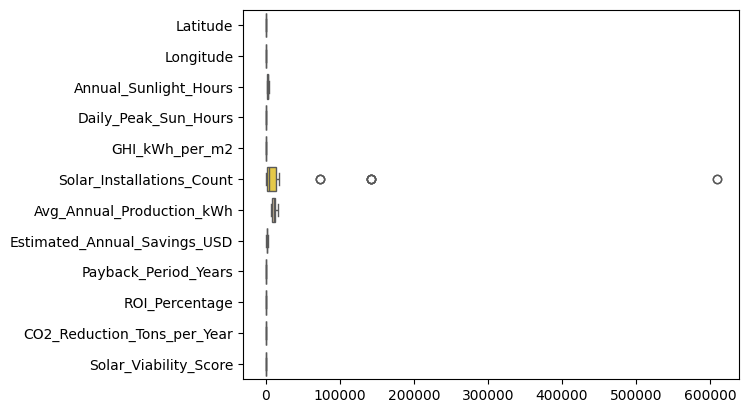

In [62]:
#Cek outlier menggunakan boxplot

df_1 = ['Latitude', 'Longitude', 'Annual_Sunlight_Hours', 'Daily_Peak_Sun_Hours',
    'GHI_kWh_per_m2', 'Solar_Installations_Count', 'Avg_Annual_Production_kWh',
    'Estimated_Annual_Savings_USD', 'Payback_Period_Years', 'ROI_Percentage',
    'CO2_Reduction_Tons_per_Year', 'Solar_Viability_Score']
ax = sns.boxplot(data=df[df_1], orient="h", palette="Set2")

Dari visualisasi tersebut terlihat bbahwa Solar Instalation Count terdapat data yang outlier, maka fitur tersebut perlu di review insight apa yang ada dalam fitur Solar Instalation Count mungkin ada beberapa fitur yang menyebabkan Solar Instalation Count mengalami outliar.Untuk Shanghai dan Beijing serta Kota di US mempunyai value yang tinggi diatas rata-rata.

Perbaiki Outlier diperlukan untuk peningkatan performance model Machine Learning. Tetapi jika model clustering outlier handling tidak mempunyai arti yang significant terhadap hasi cluster.

In [63]:
def perbaiki_outlier(df, Solar_Installations_Count):
    # Hitung Q1 (kuartil 1) dan Q3 (kuartil 3)
    Q1 = df[Solar_Installations_Count].quantile(0.25)
    Q3 = df[Solar_Installations_Count].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan atas
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    # Capping: Ganti outlier dengan batas terdekat
    df[Solar_Installations_Count] = np.where(df[Solar_Installations_Count] < batas_bawah, batas_bawah, df[Solar_Installations_Count])
    df[Solar_Installations_Count] = np.where(df[Solar_Installations_Count] > batas_atas, batas_atas, df[Solar_Installations_Count])

    return df

# Panggil fungsi untuk kolom 'nilai'
df_perbaiki = perbaiki_outlier(df, 'Solar_Installations_Count')

# Tampilkan hasil sebelum dan sesudah
print("Data sebelum perbaikan:")
print(df)
print("\nData setelah perbaikan:")
print(df_perbaiki)

Data sebelum perbaikan:
              City         Country  Latitude  Longitude  \
0         New York   United States     40.71     -74.01   
1      Los Angeles   United States     34.05    -118.24   
2            Miami   United States     25.76     -80.19   
3          Phoenix   United States     33.45    -112.07   
4          Chicago   United States     41.88     -87.63   
5           Berlin         Germany     52.52      13.40   
6           Munich         Germany     48.14      11.58   
7           London  United Kingdom     51.51      -0.13   
8       Manchester  United Kingdom     53.48      -2.24   
9            Paris          France     48.86       2.35   
10            Lyon          France     45.76       4.84   
11            Rome           Italy     41.90      12.50   
12           Milan           Italy     45.46       9.19   
13          Madrid           Spain     40.42      -3.70   
14       Barcelona           Spain     41.39       2.16   
15         Toronto          Cana

In [64]:
#Mencari tahu data yang outliers dengan mendefinisikan fungsi
num_features = ['Latitude', 'Longitude', 'Annual_Sunlight_Hours', 'Daily_Peak_Sun_Hours',
    'GHI_kWh_per_m2', 'Solar_Installations_Count', 'Avg_Annual_Production_kWh',
    'Estimated_Annual_Savings_USD', 'Payback_Period_Years', 'ROI_Percentage',
    'CO2_Reduction_Tons_per_Year', 'Solar_Viability_Score']
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print('For the feature {}, Num of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

'''Menampilkan data yang outlier'''
outliers(df[num_features])


For the feature Latitude, Num of Outliers is 0
For the feature Longitude, Num of Outliers is 0
For the feature Annual_Sunlight_Hours, Num of Outliers is 0
For the feature Daily_Peak_Sun_Hours, Num of Outliers is 0
For the feature GHI_kWh_per_m2, Num of Outliers is 0
For the feature Solar_Installations_Count, Num of Outliers is 0
For the feature Avg_Annual_Production_kWh, Num of Outliers is 0
For the feature Estimated_Annual_Savings_USD, Num of Outliers is 0
For the feature Payback_Period_Years, Num of Outliers is 0
For the feature ROI_Percentage, Num of Outliers is 0
For the feature CO2_Reduction_Tons_per_Year, Num of Outliers is 0
For the feature Solar_Viability_Score, Num of Outliers is 0


#Log Transform

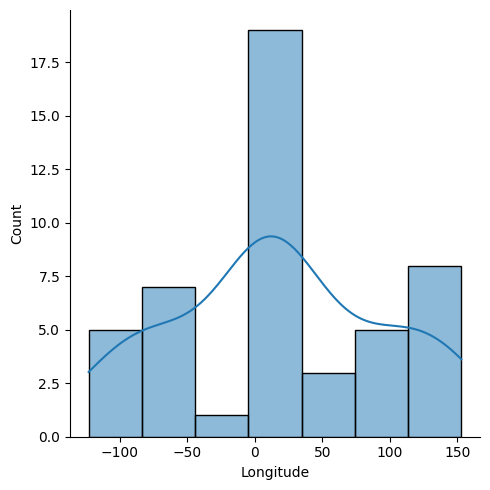

In [65]:
sns.displot(df_perbaiki['Longitude'], kde='hist')

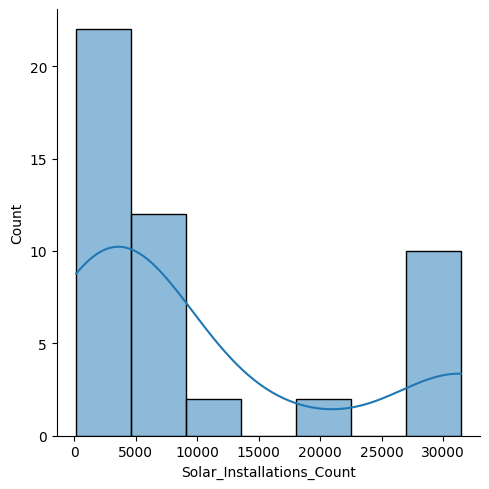

In [66]:
sns.displot(df_perbaiki['Solar_Installations_Count'], kde='hist')

In [67]:
import numpy as np

df_perbaiki['Solar_Installations_Count'] = np.log(df_perbaiki['Solar_Installations_Count'])

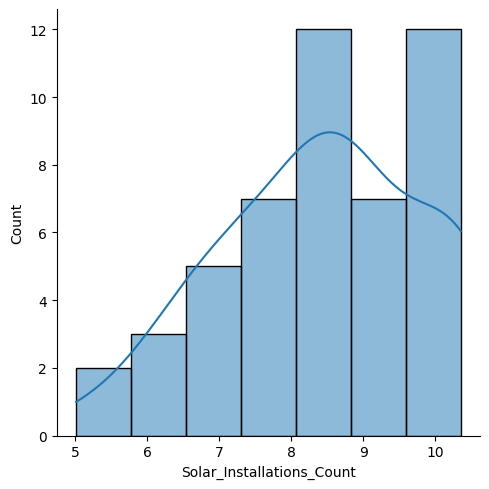

In [68]:
sns.displot(df_perbaiki['Solar_Installations_Count'], kde='hist')

Dari visualisasi tersebut diatas  karena Solar Instalation Count adalah fitur yang mempunyai skewed positif maka fitur tersebut perlu log transform agar nilai rentang tidak terlalu lebar dan fitur mendekati terdistribusi normal.

In [69]:
# Preprocessing: Seleksi fitur numerik relevan
numerical_cols = [
    'Latitude', 'Longitude', 'Annual_Sunlight_Hours', 'Daily_Peak_Sun_Hours',
    'GHI_kWh_per_m2', 'Solar_Installations_Count', 'Avg_Annual_Production_kWh',
    'Estimated_Annual_Savings_USD', 'Payback_Period_Years', 'ROI_Percentage',
    'CO2_Reduction_Tons_per_Year', 'Solar_Viability_Score'
]

X = df_perbaiki[numerical_cols]

In [70]:
# Cek dan tangani missing values (jika ada)
if X.isnull().any().any():
    X = X.fillna(X.mean())  # Imputasi dengan mean sebagai contoh

#Scaling

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dat_scale = scaler.fit_transform(X)
print(dat_scale)

[[0.80352026 0.17783813 0.44680851 0.4375     0.45945946 1.
  0.44680851 0.44680851 0.32631579 0.43925234 0.44680851 0.54054054]
 [0.73536635 0.01767156 0.74468085 0.75       0.81081081 1.
  0.74468085 0.74468085 0.11578947 0.74766355 0.74468085 0.83783784]
 [0.65053213 0.15545899 0.65957447 0.65625    0.67567568 1.
  0.65957447 0.65957447 0.16842105 0.65420561 0.65957447 0.72972973]
 [0.72922636 0.04001448 1.         1.         1.         1.
  1.         1.         0.         1.         1.         1.        ]
 [0.81549325 0.12851711 0.36170213 0.359375   0.37837838 1.
  0.36170213 0.36170213 0.41052632 0.35514019 0.36170213 0.45945946]
 [0.92437577 0.494369   0.08510638 0.078125   0.10810811 0.900801
  0.08510638 0.08510638 0.81052632 0.08411215 0.08510638 0.13513514]
 [0.87955383 0.48777838 0.12765957 0.125      0.16216216 0.900801
  0.12765957 0.12765957 0.72631579 0.13084112 0.12765957 0.18918919]
 [0.91404011 0.44537389 0.0212766  0.015625   0.02702703 0.70511441
  0.0212766  0.02

In [72]:
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 5.72594407e-01 -1.18448932e+00  1.53544962e-01  1.25440445e-01
  -3.15662185e-02  1.34950106e+00  1.53544962e-01  1.53544962e-01
  -3.57889154e-01  1.28816540e-01  1.53544962e-01  1.54371430e-01]
 [ 3.49592104e-01 -1.75629949e+00  1.36745336e+00  1.39304915e+00
   1.28158847e+00  1.34950106e+00  1.36745336e+00  1.36745336e+00
  -1.17011986e+00  1.38835604e+00  1.36745336e+00  1.28642858e+00]
 [ 7.20111602e-02 -1.26438502e+00  1.02062239e+00  1.01276654e+00
   7.76528976e-01  1.34950106e+00  1.02062239e+00  1.02062239e+00
  -9.67062183e-01  1.00667740e+00  1.02062239e+00  8.74771437e-01]
 [ 3.29501807e-01 -1.67653307e+00  2.40794628e+00  2.40713611e+00
   1.98867177e+00  1.34950106e+00  2.40794628e+00  2.40794628e+00
  -1.61684675e+00  2.41888836e+00  2.40794628e+00  1.90391430e+00]
 [ 6.11770487e-01 -1.36057014e+00 -1.93286010e-01 -1.91461731e-01
  -3.34601916e-01  1.34950106e+00 -1.93286010e-01 -1.93286010e-01
  -3.29968724e-02 -2.14694233e-01 -1.93286010e-01 -1.54371430e-01]
 [ 9.

scaling diperlukan untuk menormalisasikan data .

<Axes: >

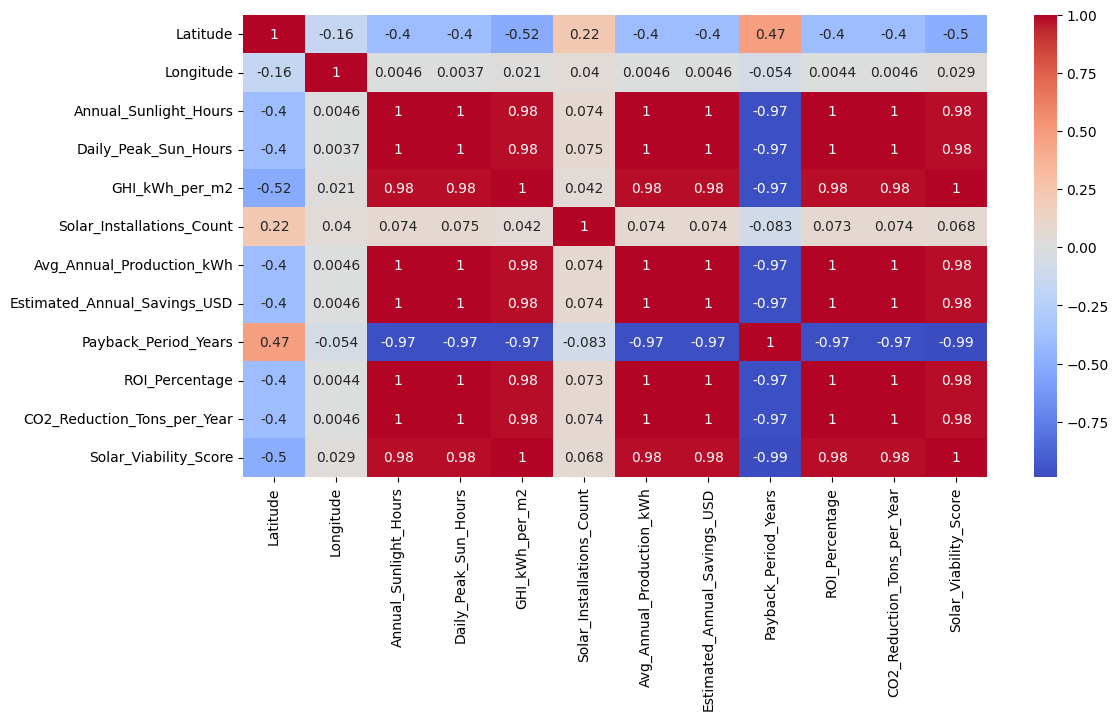

In [73]:
plt.figure(figsize=(12, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

Hampir semua fitur mempunyai korelasi dengan nilai 1 dan mendekati 1 , maka data set tersebut jika dilakukan model estimasi akan menyebabkan model yang overfitting selaen antar fitur yang mempunyai nilai korelasi mendekati 1 juga dimensi data yang kurang.

# Principal Component Analysis (PCA)
Principal Component Analysis (PCA)
PCA bertujuan untuk menemukan hubungan antara fitur-fitur pada data yang berdimensi tinggi, sehingga setiap data dapat direpresentasikan dengan sejumlah fitur yang lebih sedikit namun tetap menjaga informasi yang terkandung dalam data.

PCA mengurangi dimensi data dengan cara menggabungkan beberapa fitur yang saling berkorelasi menjadi satu fitur baru yang disebut principal component. Alasan tersebut menjadi salah satu alasan kenapa PreProcessing saya menggunakan PCA agar mpdel bisa melearning data untuk membentuk cluster yang tepat

In [74]:
from sklearn.preprocessing import StandardScaler

dat_scale = StandardScaler().fit_transform(X)

In [75]:
# Menghitung covariance matrix
cov_mat = np.cov(dat_scale.T)

print('Covariance matrix: \n%s' %cov_mat)

Covariance matrix: 
[[ 1.0212766  -0.16367165 -0.41051425 -0.41023271 -0.53048387  0.22931186
  -0.41051425 -0.41051425  0.48204761 -0.40873498 -0.41051425 -0.51149366]
 [-0.16367165  1.0212766   0.00470678  0.00379567  0.02093961  0.04123057
   0.00470678  0.00470678 -0.05489168  0.00449084  0.00470678  0.02915182]
 [-0.41051425  0.00470678  1.0212766   1.02109771  1.00006621  0.07556048
   1.0212766   1.0212766  -0.99181291  1.02107953  1.0212766   1.00388987]
 [-0.41023271  0.00379567  1.02109771  1.0212766   0.9993783   0.07626447
   1.02109771  1.02109771 -0.99135415  1.02103214  1.02109771  1.0033242 ]
 [-0.53048387  0.02093961  1.00006621  0.9993783   1.0212766   0.04285405
   1.00006621  1.00006621 -0.99241133  0.99999655  1.00006621  1.01688557]
 [ 0.22931186  0.04123057  0.07556048  0.07626447  0.04285405  1.0212766
   0.07556048  0.07556048 -0.08496055  0.07447725  0.07556048  0.06935538]
 [-0.41051425  0.00470678  1.0212766   1.02109771  1.00006621  0.07556048
   1.0212766 

In [76]:
# Menghitung correlation matrix
cor_mat = np.corrcoef(dat_scale.T)

print('Correlation matrix: \n%s' %cor_mat)

Correlation matrix: 
[[ 1.         -0.16026182 -0.40196187 -0.40168619 -0.51943212  0.22453453
  -0.40196187 -0.40196187  0.47200495 -0.40021966 -0.40196187 -0.50083754]
 [-0.16026182  1.          0.00460872  0.00371659  0.02050336  0.0403716
   0.00460872  0.00460872 -0.0537481   0.00439728  0.00460872  0.02854449]
 [-0.40196187  0.00460872  1.          0.99982484  0.97923149  0.0739863
   1.          1.         -0.97115014  0.99980704  1.          0.9829755 ]
 [-0.40168619  0.00371659  0.99982484  1.          0.97855792  0.07467562
   0.99982484  0.99982484 -0.97070094  0.99976064  0.99982484  0.98242162]
 [-0.51943212  0.02050336  0.97923149  0.97855792  1.          0.04196125
   0.97923149  0.97923149 -0.97173609  0.97916329  0.97923149  0.99570045]
 [ 0.22453453  0.0403716   0.0739863   0.07467562  0.04196125  1.
   0.0739863   0.0739863  -0.08319054  0.07292564  0.0739863   0.06791048]
 [-0.40196187  0.00460872  1.          0.99982484  0.97923149  0.0739863
   1.          1.     

In [77]:
# Menghitung eigenvector dan eigenvalue dari covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.57805050e-01 -6.01789338e-01 -5.97575828e-02 -7.55887023e-01
  -1.54406528e-01  1.18906048e-01 -1.51736796e-03 -5.22608460e-03
  -1.16585396e-03 -9.80178660e-16  9.20181478e-15 -3.61211993e-15]
 [ 8.44944549e-03  3.40431162e-01  8.74679631e-01 -3.43374101e-01
   2.38979812e-02  2.19234121e-02  3.44059986e-03 -1.12093670e-03
  -3.96636246e-04  6.44155286e-16  1.49137919e-15 -1.07080332e-15]
 [ 3.29716058e-01 -5.04189507e-02 -1.86375257e-02 -8.22073999e-02
   1.91033804e-01 -9.97028058e-02  4.25321400e-02 -3.57424587e-02
   2.86563721e-01 -1.59183185e-01  5.57286900e-01  4.79420098e-01]
 [ 3.29631041e-01 -5.12238015e-02 -1.90913582e-02 -8.14638357e-02
   2.01611601e-01 -1.19765411e-01  6.99243067e-02 -6.05330176e-01
  -6.74843420e-01  5.42937645e-13  9.07450058e-13 -6.54088476e-13]
 [ 3.28397369e-01  3.81478058e-02 -1.10277094e-02  5.27215927e-02
  -1.36904497e-01  7.68239844e-01 -5.02727155e-01 -1.51032267e-01
   5.76029436e-02 -1.16898817e-13  3.79460545e-13 -4.26213

In [78]:
# Menghitung eigenvector dan eigenvalue dari correlation matrix
eig_vals, eig_vecs = np.linalg.eig(cor_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.57805050e-01 -6.01789338e-01 -5.97575828e-02 -7.55887023e-01
  -1.54406528e-01  1.18906048e-01 -1.51736796e-03 -5.22608460e-03
  -1.16585396e-03  9.92542591e-16  6.77050413e-15 -3.02535987e-16]
 [ 8.44944549e-03  3.40431162e-01  8.74679631e-01 -3.43374101e-01
   2.38979812e-02  2.19234121e-02  3.44059986e-03 -1.12093670e-03
  -3.96636246e-04  5.31453503e-16  6.61297684e-16 -5.64722501e-16]
 [ 3.29716058e-01 -5.04189507e-02 -1.86375257e-02 -8.22073999e-02
   1.91033804e-01 -9.97028058e-02  4.25321400e-02 -3.57424587e-02
   2.86563721e-01  2.95852155e-01 -4.12632356e-02  7.52544915e-01]
 [ 3.29631041e-01 -5.12238015e-02 -1.90913582e-02 -8.14638357e-02
   2.01611601e-01 -1.19765411e-01  6.99243067e-02 -6.05330176e-01
  -6.74843420e-01  2.28076711e-13  6.07868329e-13 -4.33929125e-13]
 [ 3.28397369e-01  3.81478058e-02 -1.10277094e-02  5.27215927e-02
  -1.36904497e-01  7.68239844e-01 -5.02727155e-01 -1.51032267e-01
   5.76029436e-02  1.14054149e-13  1.63444117e-13  8.41809

In [79]:
# Membuat list dari nilai pasangan eigenvalue dan eigenvector
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Mengurutkan nilai eigenvalue dan eigenvector dari tinggi ke rendah
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Melihat hasil ranking eigenvalue
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
9.112973337216525
1.1986909037195599
1.0345541391510822
0.5842919587090479
0.04684729924202522
0.02143252149557276
0.0007374467365194518
0.0003021488213937559
0.0001702449082685631
7.055048768232399e-17
6.280399119863239e-17
6.306396501582817e-18


In [80]:
# Menghitung cummulative variance
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

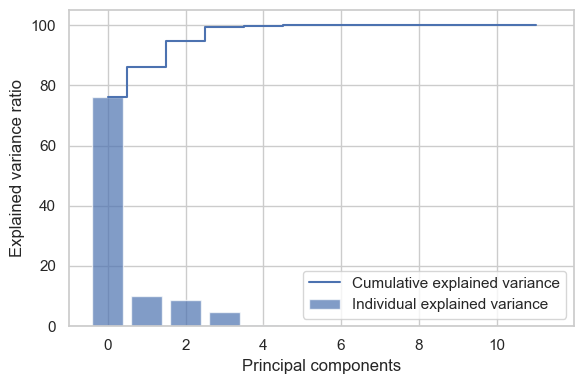

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme
sns.set_theme(style="whitegrid")

plt.figure(figsize=(6, 4))

plt.bar(
    range(len(var_exp)),
    var_exp,
    alpha=0.7,
    label='Individual explained variance'
)

plt.step(
    range(len(cum_var_exp)),
    cum_var_exp,
    where='mid',
    label='Cumulative explained variance'
)

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


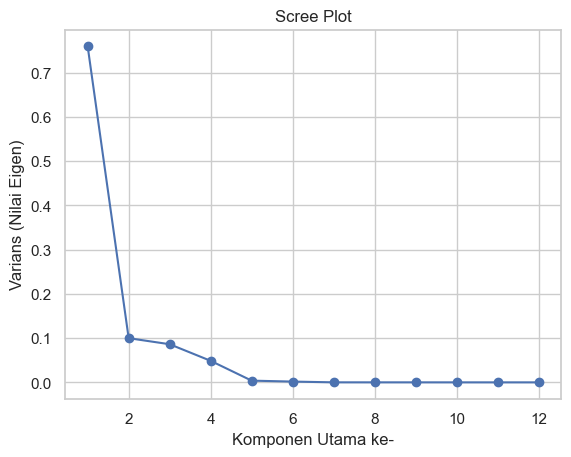

In [83]:
# Perform PCA for dimensionality reduction
feature_number = len(dat_scale[0])
pca = PCA(n_components=feature_number)

# Fit PCA with dataset
pca.fit(dat_scale)

# Get variance information
variance_ratio = pca.explained_variance_ratio_

# Calculate cummulative
cumulative_variance = np.cumsum(variance_ratio)

# Create Scree Plot
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o')
plt.xlabel('Komponen Utama ke-')
plt.ylabel('Varians (Nilai Eigen)')
plt.title('Scree Plot')
plt.show()

In [84]:
pca = PCA(n_components=5)
heart_data_reduced = pca.fit_transform(dat_scale)

In [85]:
feature_names = df.drop('Region', axis=1).columns.to_list()
component_names = [f"PC{i+1}" for i in range(pca.n_components_)]

for component, component_name in zip(pca.components_, component_names):
    feature_indices = component.argsort()[::-1]
    retained_features = [feature_names[idx] for idx in feature_indices[:pca.n_components_]]
    print(f"{component_name}: {retained_features}")

PC1: ['GHI_kWh_per_m2', 'Latitude', 'Electricity_Price_USD_per_kWh', 'Avg_Annual_Production_kWh', 'Longitude']
PC2: ['Daily_Peak_Sun_Hours', 'City', 'Longitude', 'Avg_System_Cost_USD', 'Electricity_Price_USD_per_kWh']
PC3: ['Country', 'Daily_Peak_Sun_Hours', 'Estimated_Annual_Savings_USD', 'Annual_Sunlight_Hours', 'Avg_Annual_Production_kWh']
PC4: ['City', 'Country', 'Avg_System_Cost_USD', 'Latitude', 'Electricity_Price_USD_per_kWh']
PC5: ['Solar_Installations_Count', 'Avg_System_Cost_USD', 'Longitude', 'Avg_Annual_Production_kWh', 'GHI_kWh_per_m2']


In [86]:
# Dimensionality reduction dengan PCA (reduce ke 2 dimensi)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(dat_scale)

print(f"Explained variance ratio by PCA: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {sum(pca.explained_variance_ratio_):.2f}")

Explained variance ratio by PCA: [0.75941444 0.09989091 0.08621284 0.048691   0.00390394]
Cumulative explained variance: 1.00


In [87]:
# Tentukan jumlah cluster optimal
inertia = []
sil_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_pca, kmeans.labels_))

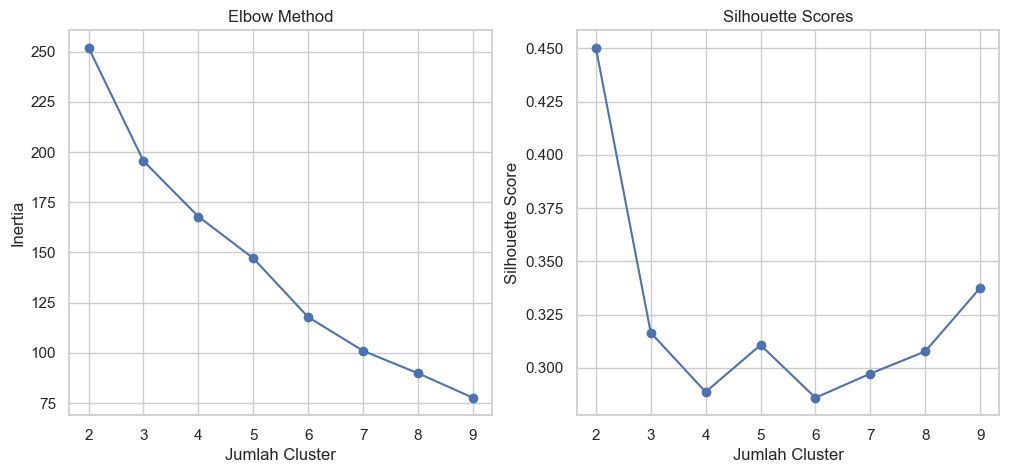

In [88]:
# Plot Elbow dan Silhouette (visualisasi)
fig, ax1 = plt.subplots(1, 2, figsize=(12, 5))
ax1[0].plot(K, inertia, 'bo-')
ax1[0].set_xlabel('Jumlah Cluster')
ax1[0].set_ylabel('Inertia')
ax1[0].set_title('Elbow Method')

ax1[1].plot(K, sil_scores, 'bo-')
ax1[1].set_xlabel('Jumlah Cluster')
ax1[1].set_ylabel('Silhouette Score')
ax1[1].set_title('Silhouette Scores')
plt.show()

In [90]:
# Pilih optimal K berdasarkan silhouette max
optimal_k = K[np.argmax(sil_scores)]
print(f"Optimal jumlah cluster: {optimal_k}")

Optimal jumlah cluster: 2


In [91]:
# Train model K-Means final
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_pca)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [92]:
# Tambahkan label cluster ke dataframe
df['Cluster'] = kmeans.labels_

# Tampilkan hasil
print("Cluster Centers (di ruang PCA):\n", kmeans.cluster_centers_)
print("\nData dengan Label Cluster:\n", df[['City', 'Country', 'Solar_Viability_Score', 'Cluster']])


Cluster Centers (di ruang PCA):
 [[ 2.18577075 -0.14962961  0.00847756 -0.08022715 -0.01027247]
 [-3.06007905  0.20948146 -0.01186858  0.11231801  0.01438145]]

Data dengan Label Cluster:
               City         Country  Solar_Viability_Score  Cluster
0         New York   United States                     56        0
1      Los Angeles   United States                     67        0
2            Miami   United States                     63        0
3          Phoenix   United States                     73        0
4          Chicago   United States                     53        1
5           Berlin         Germany                     41        1
6           Munich         Germany                     43        1
7           London  United Kingdom                     37        1
8       Manchester  United Kingdom                     36        1
9            Paris          France                     43        1
10            Lyon          France                     49        1
11     

In [93]:
print("\n--- Data untuk Cluster 0 ---")
print(df[df['Cluster'] == 0][['City', 'Country', 'Solar_Viability_Score', 'Cluster']])

print("\n--- Data untuk Cluster 1 ---")
print(df[df['Cluster'] == 1][['City', 'Country', 'Solar_Viability_Score', 'Cluster']])


--- Data untuk Cluster 0 ---
              City        Country  Solar_Viability_Score  Cluster
0         New York  United States                     56        0
1      Los Angeles  United States                     67        0
2            Miami  United States                     63        0
3          Phoenix  United States                     73        0
11            Rome          Italy                     57        0
13          Madrid          Spain                     62        0
14       Barcelona          Spain                     60        0
17          Sydney      Australia                     61        0
18       Melbourne      Australia                     56        0
19        Brisbane      Australia                     63        0
22         Beijing          China                     58        0
24           Delhi          India                     64        0
25          Mumbai          India                     61        0
26       Bangalore          India             

In [94]:
# Ringkasan per cluster (misalnya rata-rata Solar_Viability_Score)
cluster_summary = df.groupby('Cluster')['Solar_Viability_Score'].mean().sort_values()
print("\nRata-rata Solar Viability Score per Cluster:\n", cluster_summary)



Rata-rata Solar Viability Score per Cluster:
 Cluster
1    44.600000
0    61.571429
Name: Solar_Viability_Score, dtype: float64


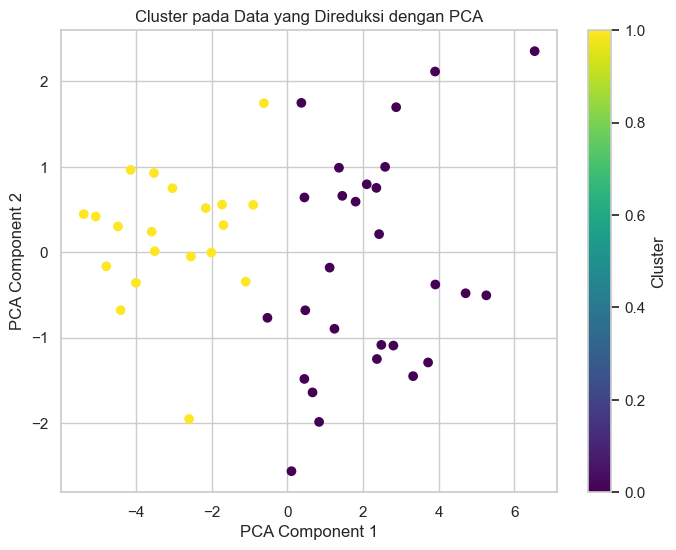

In [95]:
# Visualisasi cluster di ruang PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster pada Data yang Direduksi dengan PCA')
plt.colorbar(label='Cluster')
plt.show()

In [96]:
# Kolom-kolom penting untuk evaluasi kelayakan
indikator = [
    "Solar_Viability_Score",
    "Payback_Period_Years",
    "ROI_Percentage",
    "Estimated_Annual_Savings_USD",
    "Avg_System_Cost_USD",
    "Avg_Annual_Production_kWh",
    "CO2_Reduction_Tons_per_Year",
    "GHI_kWh_per_m2",
    "Daily_Peak_Sun_Hours",
    "Annual_Sunlight_Hours",
    "Electricity_Price_USD_per_kWh",
    "Solar_Installations_Count"
]

indikator_ada = [c for c in indikator if c in df.columns]

In [97]:
# Ringkasan rata-rata per cluster
cluster_summary = (
    df.groupby("Cluster")[indikator_ada]
      .mean(numeric_only=True)
      .sort_values(by="Solar_Viability_Score", ascending=False)
)

cluster_summary

,Solar_Viability_Score,Payback_Period_Years,ROI_Percentage,Estimated_Annual_Savings_USD,Avg_System_Cost_USD,Avg_Annual_Production_kWh,CO2_Reduction_Tons_per_Year,GHI_kWh_per_m2,Daily_Peak_Sun_Hours,Annual_Sunlight_Hours,Electricity_Price_USD_per_kWh,Solar_Installations_Count
Cluster,,,,,,,,,,,,
0,61.571429,8.003571,12.707143,1902.053571,15000.0,12680.357143,5.072143,5.253571,7.710714,2817.857143,0.15,8.431163
1,44.600000,12.270000,8.280000,1243.687500,15000.0,8291.250000,3.316500,3.520000,5.050000,1842.500000,0.15,8.480003


In [98]:
# Ambil ranking cluster berdasarkan Solar_Viability_Score tertinggi
ranking_cluster = cluster_summary.sort_values("Solar_Viability_Score", ascending=False).index.tolist()

In [99]:
# Cluster terbaik (paling layak)
best_cluster = ranking_cluster[0]
print("Cluster paling layak (Score tertinggi):", best_cluster)

Cluster paling layak (Score tertinggi): 0


In [ ]:
# Buat label kategori (Sangat Layak / Layak / Kurang Layak)
label_map = {}
if len(ranking_cluster) >= 3:
    label_map[ranking_cluster[0]] = "Sangat Layak"
    label_map[ranking_cluster[1]] = "Layak"
    for c in ranking_cluster[2:]:
        label_map[c] = "Kurang Layak"
else:
    for i, c in enumerate(ranking_cluster):
        label_map[c] = f"Kelompok-{i+1}"

df["Kategori_Kelayakan"] = df["Cluster"].map(label_map)

df[["Cluster", "Kategori_Kelayakan"]].drop_duplicates().sort_values("Cluster")

,Cluster,Kategori_Kelayakan
0,0,Kelompok-1
4,1,Kelompok-2


In [100]:
# Top 10 lokasi paling layak
# ============================================================

kolom_lokasi = [c for c in ["City", "Country", "Region"] if c in df.columns]
kolom_tampil = kolom_lokasi + [
    "Solar_Viability_Score",
    "Payback_Period_Years",
    "ROI_Percentage",
    "Estimated_Annual_Savings_USD",
    "GHI_kWh_per_m2",
    "Daily_Peak_Sun_Hours",
    "Kategori_Kelayakan"
]
kolom_tampil = [c for c in kolom_tampil if c in df.columns]

top10 = df.sort_values("Solar_Viability_Score", ascending=False).head(10)
top10[kolom_tampil]

,City,Country,Region,Solar_Viability_Score,Payback_Period_Years,ROI_Percentage,Estimated_Annual_Savings_USD,GHI_kWh_per_m2,Daily_Peak_Sun_Hours
3,Phoenix,United States,North America,73,5.8,17.2,2565.0,6.5,10.4
38,Dubai,UAE,Asia,70,6.3,15.9,2362.5,6.2,9.6
46,Cairo,Egypt,Africa,68,6.5,15.4,2295.0,6.0,9.3
1,Los Angeles,United States,North America,67,6.9,14.5,2160.0,5.8,8.8
47,Tel Aviv,Israel,Middle East,67,6.9,14.5,2160.0,5.9,8.8
29,Johannesburg,South Africa,Africa,66,7.2,13.9,2092.5,5.7,8.5
30,Cape Town,South Africa,Africa,65,7.4,13.5,2025.0,5.6,8.2
24,Delhi,India,Asia,64,7.7,13.0,1957.5,5.5,7.9
19,Brisbane,Australia,Oceania,63,7.7,13.0,1957.5,5.4,7.9
37,Athens,Greece,Europe,63,7.7,13.0,1957.5,5.4,7.9


In [101]:
# Top 10 Payback tercepat (tahun paling kecil)
# ============================================================

if "Payback_Period_Years" in df.columns:
    top10_payback = df.sort_values("Payback_Period_Years", ascending=True).head(10)
    top10_payback[kolom_tampil]
else:
    print("Kolom Payback_Period_Years tidak ditemukan.")

In [106]:
print("=== INSIGHT RINGKAS EVALUASI KELAYAKAN ENERGI SURYA ===")

# Jumlah cluster
print(f"Jumlah cluster: {df['Cluster'].nunique()}")

# Distribusi kategori kelayakan 
print("\nDistribusi kategori kelayakan:")
if "Kategori_Kelayakan" in df.columns:
    print(df["Kategori_Kelayakan"].value_counts(dropna=False))
else:
    print("Kolom 'Kategori_Kelayakan' belum ada. Jalankan mapping dulu:")
    print("df['Kategori_Kelayakan'] = df['Cluster'].map(label_map)")

# Solar Viability Score
if "Kategori_Kelayakan" in df.columns and "Solar_Viability_Score" in df.columns:
    print("\nRata-rata Solar Viability Score per kategori:")
    print(
        df.groupby("Kategori_Kelayakan")["Solar_Viability_Score"]
        .mean()
        .sort_values(ascending=False)
    )

# ROI
if "Kategori_Kelayakan" in df.columns and "ROI_Percentage" in df.columns:
    print("\nRata-rata ROI (%) per kategori:")
    print(
        df.groupby("Kategori_Kelayakan")["ROI_Percentage"]
        .mean()
        .sort_values(ascending=False)
    )

# Payback Period
if "Kategori_Kelayakan" in df.columns and "Payback_Period_Years" in df.columns:
    print("\nRata-rata Payback Period (tahun) per kategori (lebih kecil lebih baik):")
    print(
        df.groupby("Kategori_Kelayakan")["Payback_Period_Years"]
        .mean()
        .sort_values()
    )


=== INSIGHT RINGKAS EVALUASI KELAYAKAN ENERGI SURYA ===
Jumlah cluster: 2

Distribusi kategori kelayakan:
Kolom 'Kategori_Kelayakan' belum ada. Jalankan mapping dulu:
df['Kategori_Kelayakan'] = df['Cluster'].map(label_map)


In [107]:
# ============================================================
df.to_csv("hasil_evaluasi_kelayakan_energi_surya.csv", index=False)
print("File tersimpan: hasil_evaluasi_kelayakan_energi_surya.csv")

File tersimpan: hasil_evaluasi_kelayakan_energi_surya.csv


In [108]:
import pickle

with open("scaler_solar.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [109]:
with open("pca_solar.pkl", "wb") as f:
    pickle.dump(pca, f)

In [110]:
with open("kmeans_solar.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [111]:
feature_names_solar = X.columns.tolist()

with open("feature_names_solar.pkl", "wb") as f:
    pickle.dump(feature_names_solar, f)